In [1]:
import sys
import os
import importlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from sklearn.preprocessing import normalize
sys.path.insert(0, os.path.join(os.getcwd(),"..","data"))
sys.path.insert(0, os.path.join(os.getcwd(),"..","src","data"))
sys.path.insert(0, os.path.join(os.getcwd(),"..","src","model"))
from DataLoader import DataLoader

In [47]:
import pandas as pd

d_train = DataLoader()
d_train.papers(["2013","2014","2015"]).abstracts().conferences().conferenceseries()

d_test = DataLoader()
d_test.papers(["2016"]).abstracts().conferences().conferenceseries()

print(len(d_train.data))

d_train.data.drop(
    list(d_test.data[pd.isnull(d_test.data.chapter_abstract)].index),
    inplace=True
)

print(len(d_train.data))

d_test.data.drop(
    list(d_test.data[pd.isnull(d_test.data.chapter_abstract)].index),
    inplace=True
)

Process 'chapters_books_2013' not in memory yet.
Process 'chapters_bookeditions_2013' not in memory yet.
Process 'chapters_2013#title' not in memory yet.
Process 'chapters_2013#language' not in memory yet.
Process 'chapters_books_2014' not in memory yet.
Process 'chapters_bookeditions_2014' not in memory yet.
Process 'chapters_2014#title' not in memory yet.
Process 'chapters_2014#language' not in memory yet.
Process 'chapters_books_2015' not in memory yet.
Process 'chapters_bookeditions_2015' not in memory yet.
Process 'chapters_2015#title' not in memory yet.
Process 'chapters_2015#language' not in memory yet.
Process 'chapters_2013#abstract' not in memory yet.
Process 'chapters_2014#abstract' not in memory yet.
Process 'chapters_2015#abstract' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences#acronym' not in memory yet.
Process 'conferences#city' not in memory yet.
Process 'conferences#country' not in memory yet.
Process 'conferences#dateend' not i

# Training vs. Test set

In [3]:
print(len(d_train.data))
print(len(d_test.data))

57797
21323


# Tfidf matrix

In [4]:
from sklearn.utils.extmath import randomized_svd

from LSAAbstractsModel import LSAAbstractsModel
model = LSAAbstractsModel()
model._load_model_x()

data = model.stem_matrix

U, S, Vt = randomized_svd(
    data,
    n_components=100,
    n_iter=5,
    random_state=None
)

Loading persistent models: X
Loaded.


# Labels

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(list(model.data.conference_name))

# Left singular vectors plot

D:\Entwicklung\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


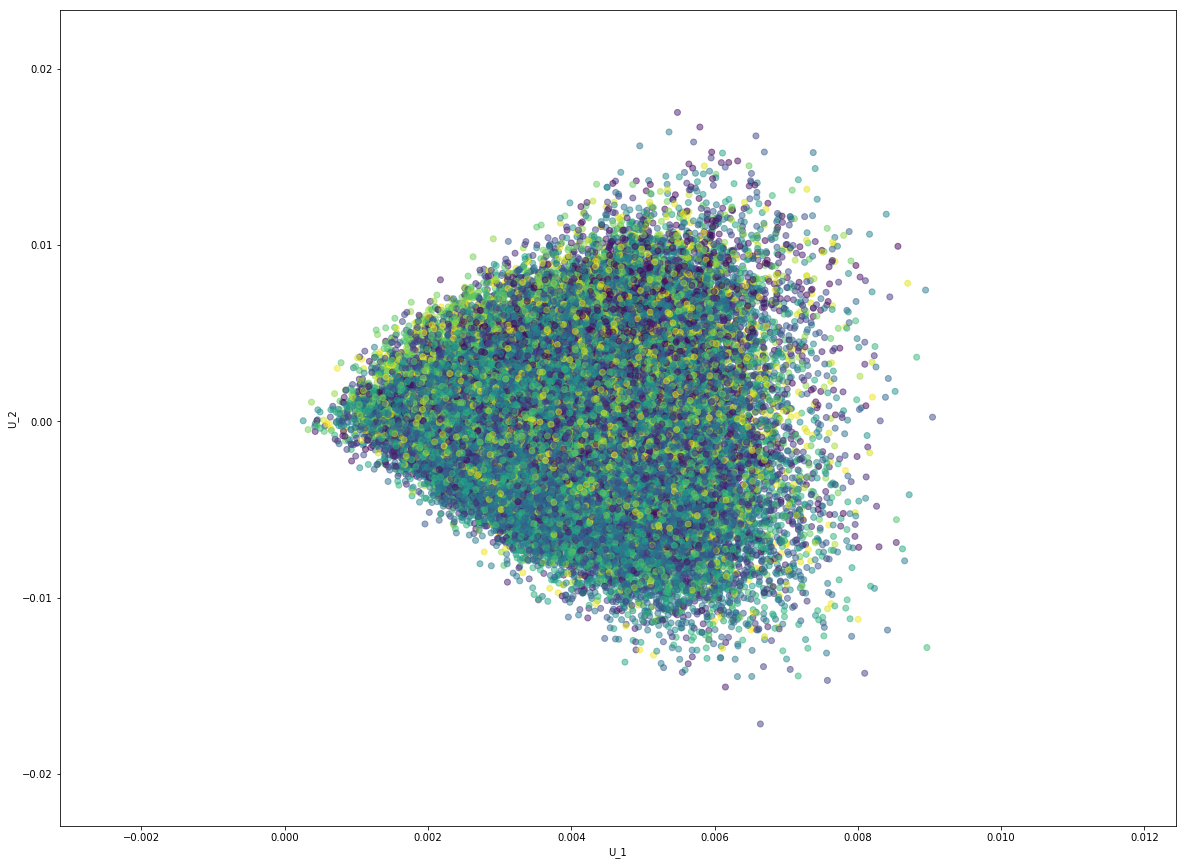

In [6]:
plt.figure(figsize=(20,15))

plt.scatter(
    U[:,0]
    ,U[:,1]
    #,s # marker size
    ,c=labels
    ,alpha=0.5
    #,label="Luck"
)
plt.xlabel("U_1")
plt.ylabel("U_2")
plt.legend(loc=2)
plt.show()

In [7]:
U[labels==1]

array([[ 0.00660616, -0.00221643, -0.00314556, ...,  0.00306833,
         0.00157996, -0.00859827],
       [ 0.00378428, -0.00219845, -0.00082972, ...,  0.00238625,
        -0.00862308,  0.00045387],
       [ 0.00301638, -0.0020818 , -0.00118753, ..., -0.00108734,
        -0.0052814 ,  0.00642184],
       ..., 
       [ 0.00215678, -0.00092085, -0.00023368, ..., -0.00039773,
         0.00099177,  0.00100318],
       [ 0.00408582, -0.00286247, -0.00283892, ..., -0.00335761,
        -0.00988914, -0.00017236],
       [ 0.00378602, -0.00266461, -0.00235302, ..., -0.00042904,
        -0.00354858, -0.00195795]])

# Abstract length

In [8]:
df = d_train.data[["chapter_abstract"]]
df["len"] = df.chapter_abstract.apply(lambda x: len(str(x).split(" ")))

D:\Entwicklung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
hist = df.groupby("len").size()

In [42]:
print(df[["len"]].median())
print(df[["len"]].mean())

len    132.0
dtype: float64
len    135.566846
dtype: float64


In [46]:
print(len(df[["len"]]))
print(df[["len"]].min())
print(df[["len"]].max())

57797
len    1
dtype: int64
len    895
dtype: int64


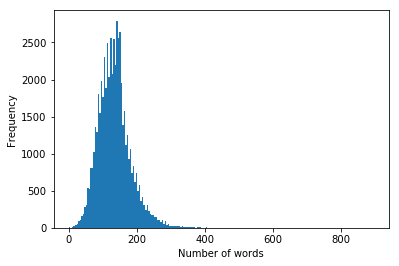

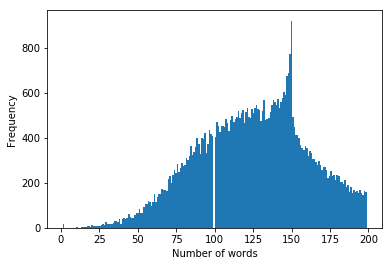

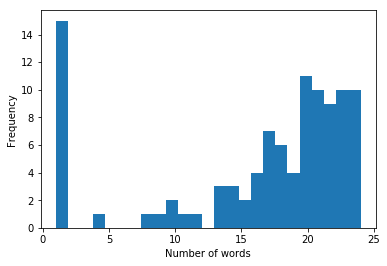

In [49]:
df[["len"]].plot(kind="hist",bins=200)
plt.legend().remove()
plt.xlabel("Number of words")
plt.show()

df[["len"]][df[["len"]]<200].plot(kind="hist",bins=200)
plt.legend().remove()
plt.xlabel("Number of words")
plt.show()

df[["len"]][df[["len"]]<25].plot(kind="hist",bins=25)
plt.legend().remove()
plt.xlabel("Number of words")
plt.show()